In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


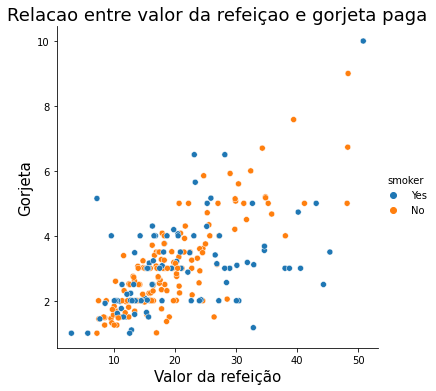

In [3]:
sns.relplot(x='total_bill', y='tip', hue='smoker', data=df)
plt.title('Relacao entre valor da refeiçao e gorjeta paga',fontsize=18)
plt.xlabel('Valor da refeição',fontsize=15)
plt.ylabel('Gorjeta',fontsize=15)
plt.show()

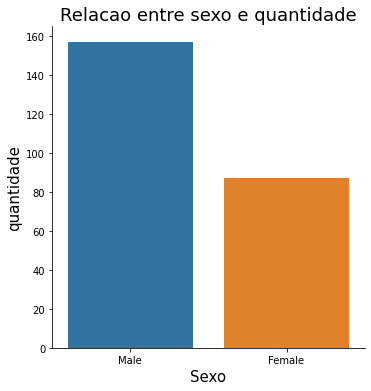

In [4]:
sex = df['sex'].value_counts()
sns.catplot(x= sex.index, y=sex.values, kind="bar", data=df)
plt.title('Relacao entre sexo e quantidade',fontsize=18)
plt.xlabel('Sexo',fontsize=15)
plt.ylabel('quantidade',fontsize=15)
plt.show()

In [5]:
sex

Male      157
Female     87
Name: sex, dtype: int64

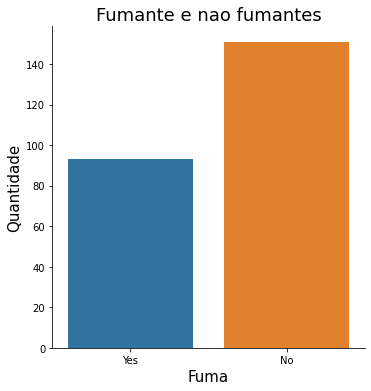

In [7]:

sns.catplot(x= 'smoker', kind="count", data=df)
plt.title('Fumante e nao fumantes',fontsize=18)
plt.xlabel('Fuma',fontsize=15)
plt.ylabel('Quantidade',fontsize=15)
plt.show()

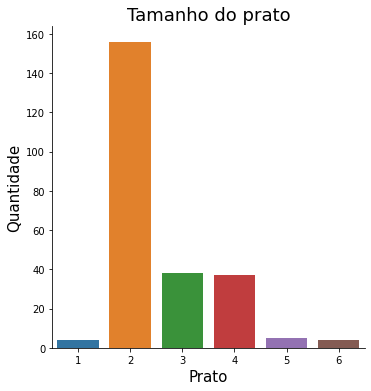

In [33]:
sns.catplot(x= 'size', kind="count", data=df)
plt.title('Tamanho do prato',fontsize=18)
plt.xlabel('Prato',fontsize=15)
plt.ylabel('Quantidade',fontsize=15)
plt.show()

In [46]:
df[(df['size'] >=  5)].count()[0]

9

## Analisando varialvel coluna smoker
Para o grafico precisamos dos valores. Quantidade de Homem,
quantodade de mulheres, homens fumante e mulher fumante

In [8]:
men = df[(df.sex=='Male')].count()[0]
women = df[(df.sex=='Female')].count()[0]
men_smoker = df[(df.sex=='Male') & (df.smoker=='Yes')].count()[0]
women_smoker = df[(df.sex=='Female') & (df.smoker=='Yes')].count()[0]

In [ ]:
men

157

com os dados em maos, vamos criar os arrays, com as porcentagens corretas.
Depois criar o DataFrame e nomear os indixes e colunas

In [9]:
m1 = np.array([men - men_smoker,men_smoker])/men
m2 = np.array([women - women_smoker,women_smoker])/women

In [10]:
df[(df.sex=='Male') & (df.smoker=='Yes')].count()[0]

60

In [11]:
p = pd.DataFrame([m1,m2],index=['Homem','Mulher'],columns=['Nao Fumante','Fumante'])

In [12]:
p

,Nao Fumante,Fumante
Homem,0.617834,0.382166
Mulher,0.620690,0.379310


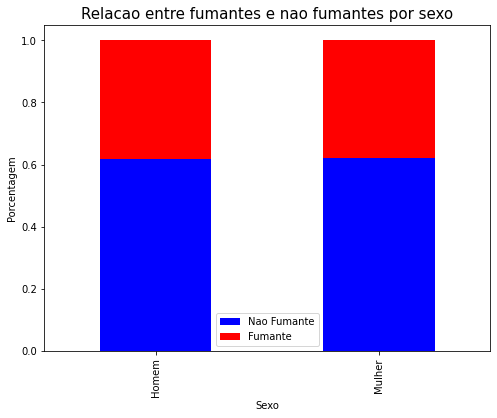

In [13]:
p.plot(kind = 'bar',
        stacked = True,
        figsize=(8,6),
        color = ['blue','red']
)
plt.title('Relacao entre fumantes e nao fumantes por sexo',fontsize=15)
plt.xlabel('Sexo')
plt.ylabel('Porcentagem')        
plt.show()

In [29]:
men_size = df[(df.sex=='Male') & (df['size'] >= 5)].count()[0]
women_size = df[(df.sex=='Female') & (df['size'] >=  5)].count()[0]

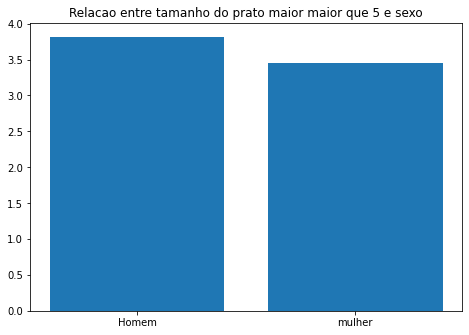

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sexo = ['Homem', 'mulher']
porcentagem = [(men_size/men)*100, (women_size/women)*100]
ax.bar(sexo,porcentagem)
plt.title('Relacao entre tamanho do prato maior maior que 5 e sexo')
plt.show()